In [1]:
!pip install kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()  # Upload kaggle.json here



Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"navanithasudev","key":"51ead86f86407b540e45ee5ce9055a93"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv "/content/kaggle (1) (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
# Step 1: Delete corrupted file (if it exists)
!rm -f us-accidents.zip


In [10]:
!kaggle datasets download -d sobhanmoosavi/us-accidents --force

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
 98% 642M/653M [00:01<00:00, 258MB/s]
100% 653M/653M [00:01<00:00, 367MB/s]


In [11]:
!unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_March23.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
import pandas as pd

# Load first 100,000 rows (adjust if needed)
df = pd.read_csv("/content/US_Accidents_March23.csv", nrows=100000)

# Check the data
df.shape
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [13]:
df.drop(['ID', 'Source', 'End_Lat', 'End_Lng', 'Description',
         'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
         'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1, inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

,0
Wind_Chill(F),95678
Precipitation(in),92632
Wind_Speed(mph),23820
Humidity(%),1856
Visibility(mi),1846
Weather_Condition,1604
Temperature(F),1591
Pressure(in),1292
Wind_Direction,1064
City,1


In [15]:
df.dropna(subset=['Start_Time', 'Weather_Condition', 'Visibility(mi)',
                  'Wind_Speed(mph)', 'Temperature(F)', 'Precipitation(in)'], inplace=True)

In [16]:
# Feature Engineering
# Convert Start_Time to datetime

df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour and weekday
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()

/tmp/ipython-input-17-2996796815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='magma')


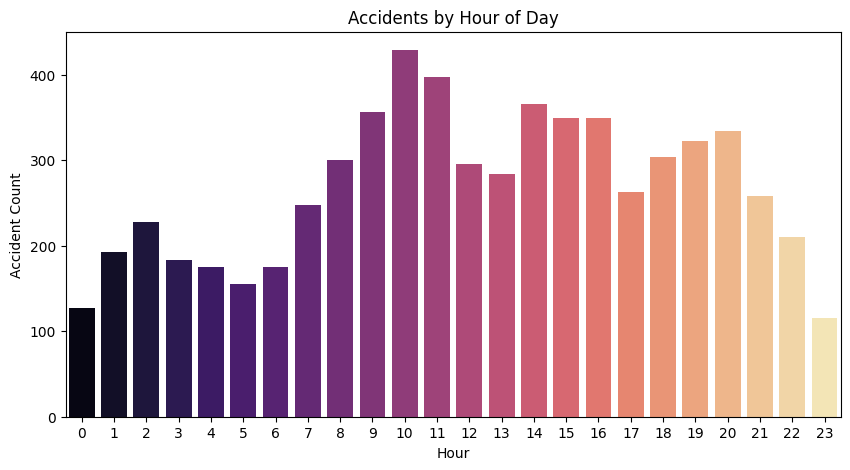

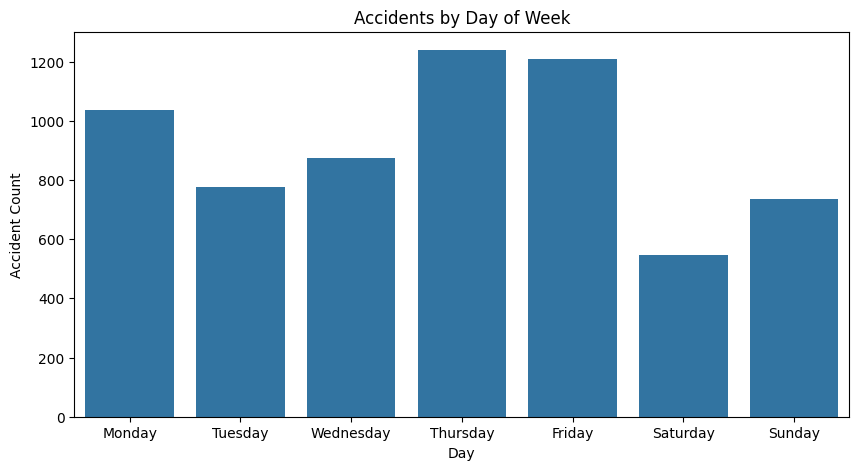

In [17]:
# Accidents by hour
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='magma')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.show()



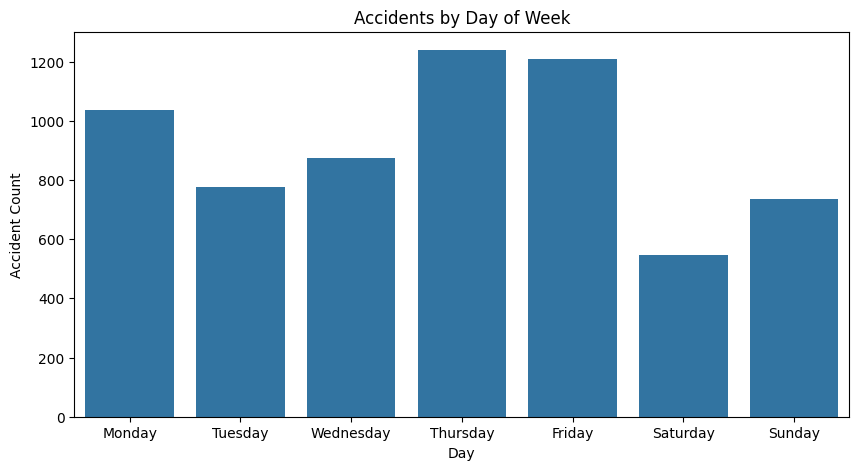

In [18]:
# Accidents by day of week
plt.figure(figsize=(10,5))
sns.countplot(x='Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Accident Count")
plt.show()


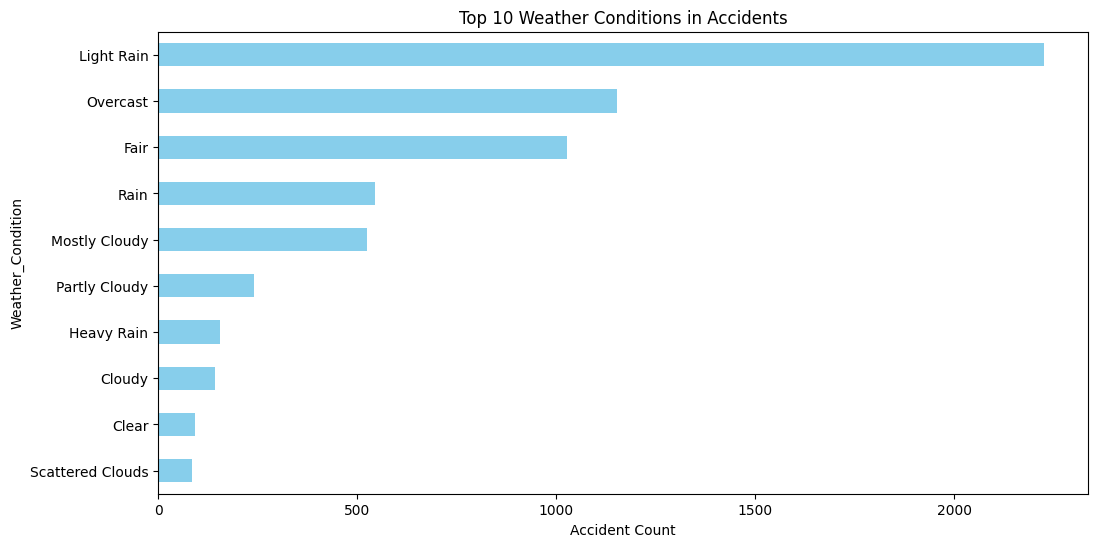

In [19]:
plt.figure(figsize=(12,6))
df['Weather_Condition'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Weather Conditions in Accidents")
plt.xlabel("Accident Count")
plt.gca().invert_yaxis()
plt.show()


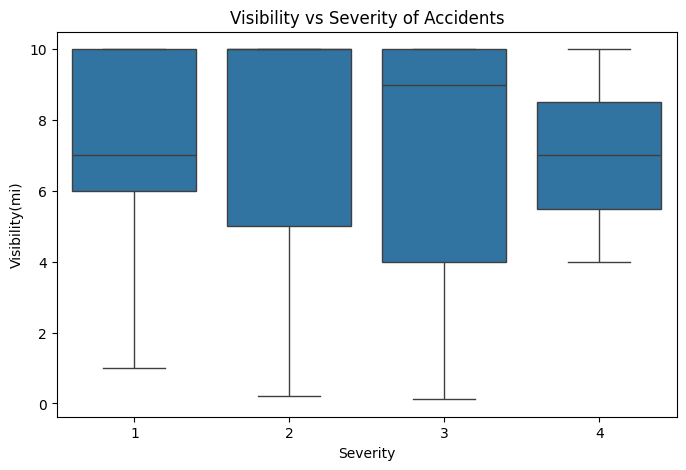

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
plt.title("Visibility vs Severity of Accidents")
plt.show()


In [21]:
import folium
from folium.plugins import HeatMap

map_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(5000)

m = folium.Map(location=[map_df['Start_Lat'].mean(), map_df['Start_Lng'].mean()], zoom_start=5)
HeatMap(map_df).add_to(m)
m
